In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
#problem1

In [3]:
#a

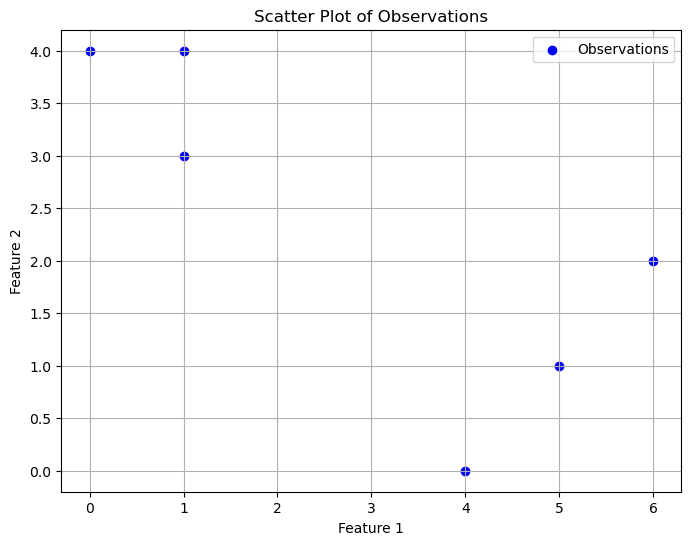

In [4]:
# Define the data matrix X
X = [
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
]

# Separate the points for plotting
x_values = [point[0] for point in X]
y_values = [point[1] for point in X]

# Plot the observations
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Observations')

# Set the title and labels
plt.title('Scatter Plot of Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot with a grid
plt.grid(True)
plt.legend()
plt.show()

In [5]:
#b

In [6]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Randomly assign a cluster label (0 or 1) to each observation
cluster_labels = np.random.choice([0, 1], len(X))

# Report the cluster labels for each observation
cluster_labels.tolist()


[0, 1, 1, 0, 1, 1]

In [13]:
cluster_labels=cluster_labels.tolist()

In [14]:
cluster_labels

[0, 1, 1, 0, 1, 1]

In [15]:
#c

In [8]:
# Create an array from the list to facilitate indexing by cluster label
X_array = np.array(X)

# Compute the centroid for each cluster by taking the mean of the points in each cluster
centroids = [X_array[cluster_labels == k].mean(axis=0) for k in range(2)]

# Convert centroids to a list for display
centroids = [centroid.tolist() for centroid in centroids]
centroids

[[3.0, 2.5], [2.75, 2.25]]

In [9]:
#d

In [10]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

# Assign each observation to the closest centroid
new_cluster_labels = []
for point in X:
    # Calculate the distance to each centroid
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    # Find the closest centroid (the one with the minimum distance)
    closest_centroid = np.argmin(distances)
    # Assign the cluster label of the closest centroid
    new_cluster_labels.append(closest_centroid)

# Report the new cluster labels for each observation
new_cluster_labels

[1, 1, 1, 0, 0, 1]

In [11]:
#e

In [18]:
# Initialize variables for the loop
previous_labels = cluster_labels
current_labels = new_cluster_labels
iterations = 0

# Loop until the cluster labels stop changing
while current_labels != previous_labels:
    iterations += 1
    previous_labels = current_labels
    # Compute the new centroids
    centroids = [X_array[current_labels == k].mean(axis=0) for k in range(2)]
    
    # Assign each observation to the closest centroid
    new_cluster_labels = []
    for point in X:
        # Calculate the distance to each centroid
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        # Find the closest centroid (the one with the minimum distance)
        closest_centroid = np.argmin(distances)
        # Assign the cluster label of the closest centroid
        new_cluster_labels.append(closest_centroid)
    
    # Update the current labels for the next iteration
    current_labels = new_cluster_labels

# The final centroids and cluster labels
final_centroids = centroids
final_cluster_labels = current_labels
iterations, final_centroids, final_cluster_labels


/var/folders/37/1sxv3rdx75qb52g8vgmt8l3r0000gn/T/ipykernel_30341/3279841092.py:11: RuntimeWarning: Mean of empty slice.
  centroids = [X_array[current_labels == k].mean(axis=0) for k in range(2)]


(1,
 [array([[nan, nan],
         [nan, nan],
         [nan, nan],
         [nan, nan],
         [nan, nan],
         [nan, nan]]),
  array([[nan, nan],
         [nan, nan],
         [nan, nan],
         [nan, nan],
         [nan, nan],
         [nan, nan]])],
 [0, 0, 0, 0, 0, 0])

In [19]:
# Initialize centroids to two random points from the dataset
np.random.seed(0)
initial_centroids_indices = np.random.choice(len(X), 2, replace=False)
centroids = X_array[initial_centroids_indices, :]

# Initialize labels
labels = np.zeros(len(X))

# Begin the iterative process
changed = True
while changed:
    changed = False
    # For each observation
    for i, point in enumerate(X_array):
        # Compute distances to the centroids
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        # Find the closest centroid
        closest_centroid = np.argmin(distances)
        # If the point's label changes, we'll need to update the centroids
        if labels[i] != closest_centroid:
            changed = True
            labels[i] = closest_centroid
    # Update centroids
    centroids = [X_array[labels == k].mean(axis=0) for k in range(2)]

labels.tolist(), centroids


([1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 [array([5., 1.]), array([0.66666667, 3.66666667])])

In [20]:
#f

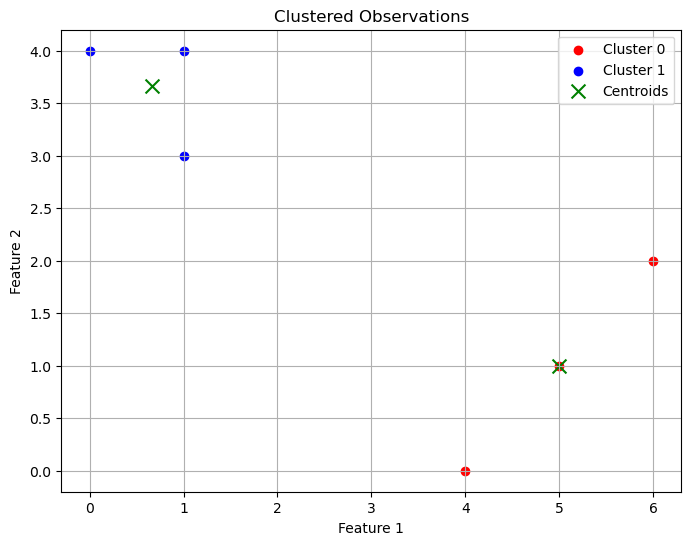

In [21]:
# Plot the observations with their cluster labels
plt.figure(figsize=(8, 6))

# Separate points by cluster
cluster_0 = X_array[labels == 0]
cluster_1 = X_array[labels == 1]

# Plot points from Cluster 0
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], color='red', label='Cluster 0')

# Plot points from Cluster 1
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='blue', label='Cluster 1')

# Plot centroids
plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids],
            color='green', marker='x', s=100, label='Centroids')

# Set the title and labels
plt.title('Clustered Observations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
#problem2

In [23]:
from sklearn.datasets import fetch_olivetti_faces

# Fetch the Olivetti faces dataset
olivetti_data = fetch_olivetti_faces()

# Load the data and target (faces and labels)
data = olivetti_data.data
images = olivetti_data.images
target = olivetti_data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/rain/scikit_learn_data


In [24]:
#b

In [26]:
# Fetch the Olivetti faces dataset
data = fetch_olivetti_faces()
faces = data.images
# Demean each face in the dataset
demeaned_faces = faces - faces.mean(axis=(1, 2), keepdims=True)

In [29]:
demeaned_faces

array([[[-0.32692954, -0.2690783 , -0.21949154, ..., -0.26494607,
         -0.3062684 , -0.33106178],
        [-0.2938717 , -0.23188823, -0.19883037, ..., -0.26494607,
         -0.2980039 , -0.3227973 ],
        [-0.2938717 , -0.21949154, -0.18643367, ..., -0.25668162,
         -0.2980039 , -0.33932623],
        ...,
        [-0.42197087, -0.43023533, -0.41370642, ..., -0.48395434,
         -0.47155765, -0.4632932 ],
        [-0.43436757, -0.42610312, -0.42610312, ..., -0.48808658,
         -0.4756899 , -0.47155765],
        [-0.43436757, -0.43023533, -0.43436757, ..., -0.48395434,
         -0.4756899 , -0.4798221 ]],

       [[-0.1348584 , -0.1183295 , -0.07700717, ..., -0.39932123,
         -0.40345347, -0.40345347],
        [-0.14312288, -0.1059328 , -0.06874269, ..., -0.37452784,
         -0.37866008, -0.37866008],
        [-0.09353611, -0.07287496, -0.056346  , ..., -0.38692454,
         -0.3827923 , -0.3827923 ],
        ...,
        [ 0.18332338,  0.19158787,  0.20398456, ..., -

In [27]:
#c

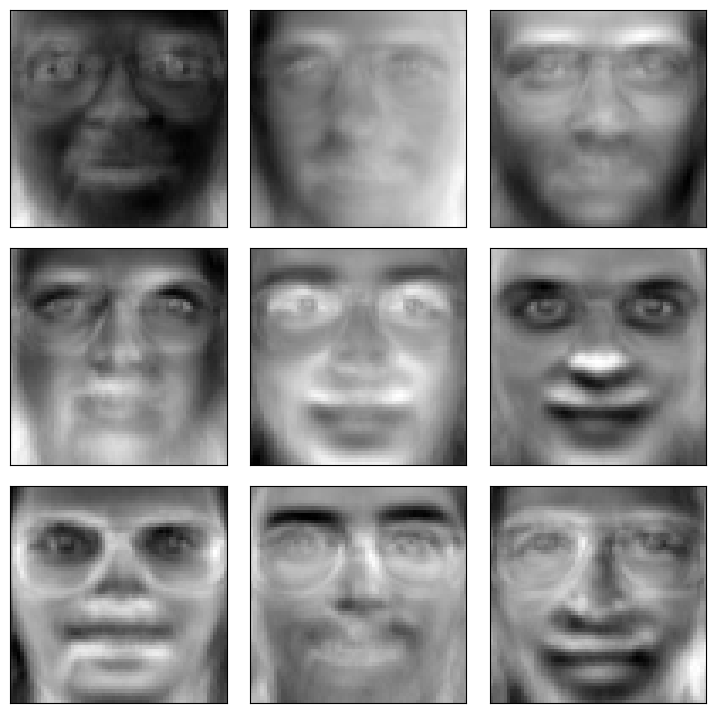

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reshape the faces data array
n_samples, height, width = faces.shape[0], faces.shape[1], faces.shape[2]
X = faces.reshape(n_samples, height * width)

# Perform PCA
n_components = 9
pca = PCA(n_components=n_components, whiten=True).fit(X)

# Extract the components (eigenfaces)
eigenfaces = pca.components_.reshape((n_components, height, width))

# Display the eigenfaces
fig, axes = plt.subplots(3, 3, figsize=(9, 9),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')

plt.show()


In [32]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

data = fetch_olivetti_faces()
faces = data.images  # Each image is 64x64 pixels

# Flatten the images
faces_flattened = faces.reshape((faces.shape[0], -1))  # Flatten each 64x64 image into a 4096-length vector
faces_flattened_demeaned = faces_flattened - faces_flattened.mean(axis=0)


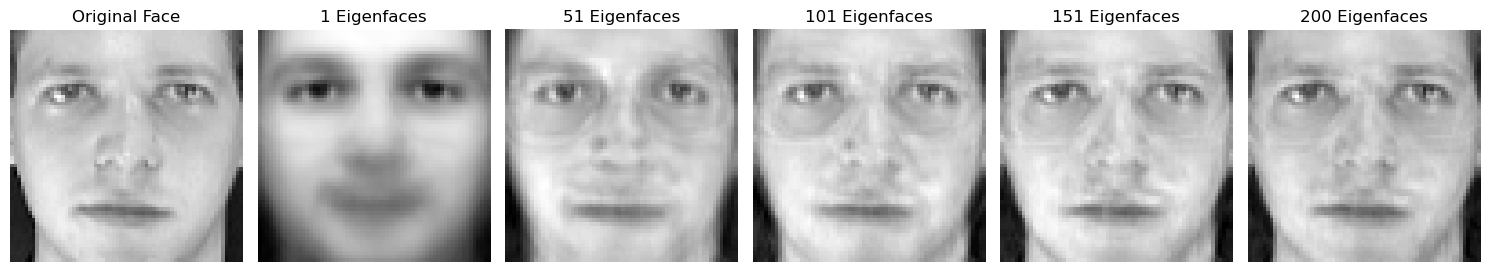

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'faces_flattened' is your dataset with each face flattened into a 1D array
# 'faces' is the original data in its original shape

# Compute PCA
n_components = 200 # or the maximum number of components you want to use
pca = PCA(n_components=n_components)
faces_projected = pca.fit_transform(faces_flattened) # Fit PCA and project faces onto the PCA basis
mean_face = pca.mean_.reshape(faces[0].shape) # Reshape the mean face back to the original shape

# Choose a face to reconstruct
target_face_index = 0 # For example, choose the first face
target_face = faces[target_face_index]
target_face_projected = faces_projected[target_face_index]

# Incrementally reconstruct the face using 1, 51, 101, ... eigenfaces
steps = [1, 51, 101, 151, 200] # Adjust based on your dataset and requirements
fig, axes = plt.subplots(1, len(steps) + 1, figsize=(15, 3))
axes[0].imshow(target_face, cmap='gray')
axes[0].set_title('Original Face')
axes[0].axis('off')

for i, n in enumerate(steps):
    # Reconstruct the face using the first n components
    reconstructed_face = np.dot(target_face_projected[:n], pca.components_[:n]) + pca.mean_
    reconstructed_face_image = reconstructed_face.reshape(faces[0].shape) # Reshape to the original shape
    
    # Display the reconstructed face
    axes[i + 1].imshow(reconstructed_face_image, cmap='gray')
    axes[i + 1].set_title(f'{n} Eigenfaces')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()